# 0.0 Imports

In [8]:
import numpy as np
from sklearn import datasets as dt
from sklearn import model_selection as ms
from sklearn import tree as tr
from sklearn import metrics as mt

from six import StringIO
from matplotlib import pyplot as plt
import cv2

# 1.0 Load Dataset

In [31]:
X, y = dt.make_regression(n_features=4, random_state=0)

In [32]:
X_train, x_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=0)

# 2.0 Train Decision Tree Regressosor

In [33]:
max_depth_values = np.arange(2,25,1)
rmse_list = []
for i in max_depth_values:
    # define
    model = tr.DecisionTreeRegressor(max_depth=i, random_state=0)
    
    # fit
    model.fit(X_train, y_train)
    
    # performance
    y_pred = model.predict(x_test)
    mse = mt.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

Text(0, 0.5, 'RMSE')

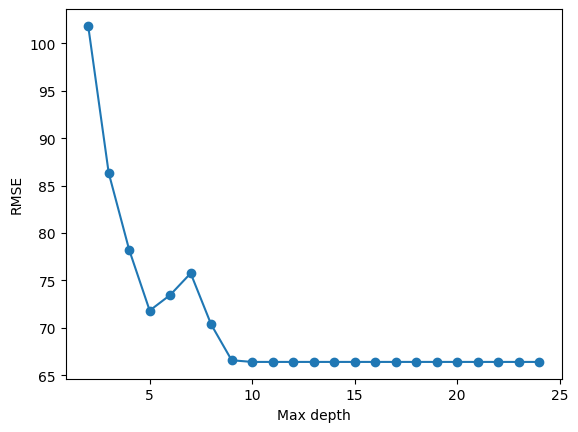

In [34]:
plt.plot(max_depth_values, rmse_list, marker='o')
plt.xlabel('Max depth')
plt.ylabel('RMSE')

In [6]:
# Export 
dot_data = StringIO()

tr.export_graphviz(
    model,
    out_file='tree_reg.dot',
    rounded=True,
    filled=True
)

In [7]:
# sudo apt install graphvizs
!dot -Tpng tree_reg.dot -o tree_reg.png

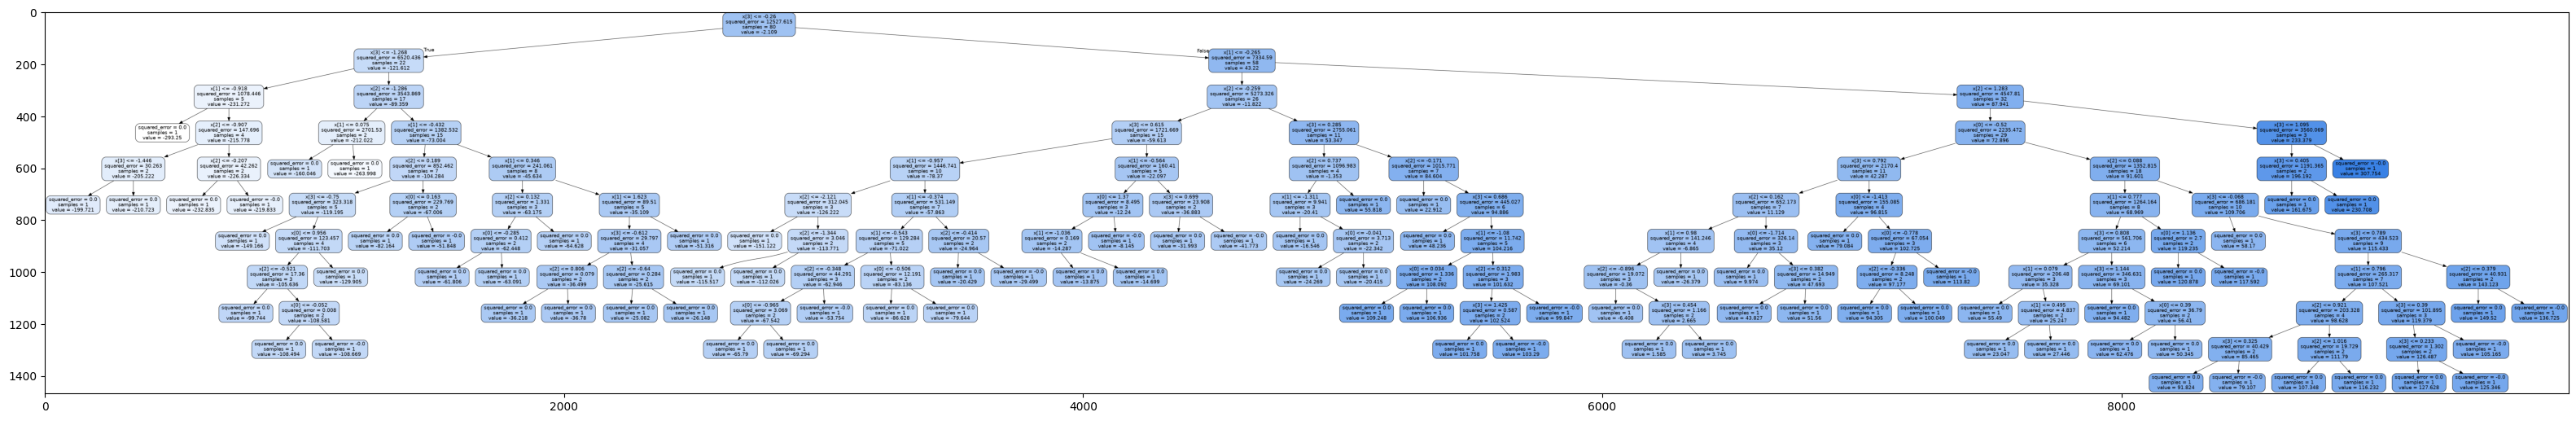

In [13]:
img = cv2.imread('tree_reg.png')
plt.figure(figsize=(40,20))
plt.imshow(img);